In [14]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [15]:
def get_pvalue(x):
    return round(shapiro(x).pvalue, 5)

In [16]:
page_id = '8'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 163; 
Attentive: 131; Non Attentive: 32


In [17]:
survey_response_df = pd.DataFrame(survey_response)

csquest = pd.json_normalize(survey_response_df[page_id])
csquest.drop(attention.get(page_id).keys(), axis=1, inplace=True)

qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest[qualindex]
# csquestqual.to_csv('qualitative/csquest_qual.csv')
csquestqual

csquestquant = csquest.drop(qualindex, axis=1).fillna(4).astype(float)

# normalize scale 1 to 8 to scale -3 to 3
normcsquestquant = csquestquant - 4
csquestquant.update(normcsquestquant)

new_columns = {}
for qsid in csquestquant.columns:
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestquant.rename(columns=new_columns, inplace=True)

In [18]:
csquestquant['did'] = dids
csquestquant['design'] = csquestquant['did'].apply(lambda x: get_design(x))
csquestquant.drop('did', axis=1, inplace=True)
csquestquant.to_csv('data/csvs/csquestquant.csv', index=False)
did_csquestquant = csquestquant.groupby('design').mean()
display(csquestquant.head())
display(csquestquant.describe())

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation,design
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0,Metaphor
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0,Personal
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0,Consequences
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,Consequences
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,Logos


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.022901,1.015267,0.427481,1.610687,0.694656,0.732824,1.671756,0.839695,1.152672,1.526718,1.839695,1.595420,1.244275,1.564885,1.312977,1.503817
std,1.464795,1.358646,1.727740,1.389923,1.818254,1.708911,1.315252,1.450818,1.511358,1.464074,1.396792,1.423855,1.430931,1.359294,1.347841,1.531083
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.500000,3.000000,3.000000,2.000000,2.500000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


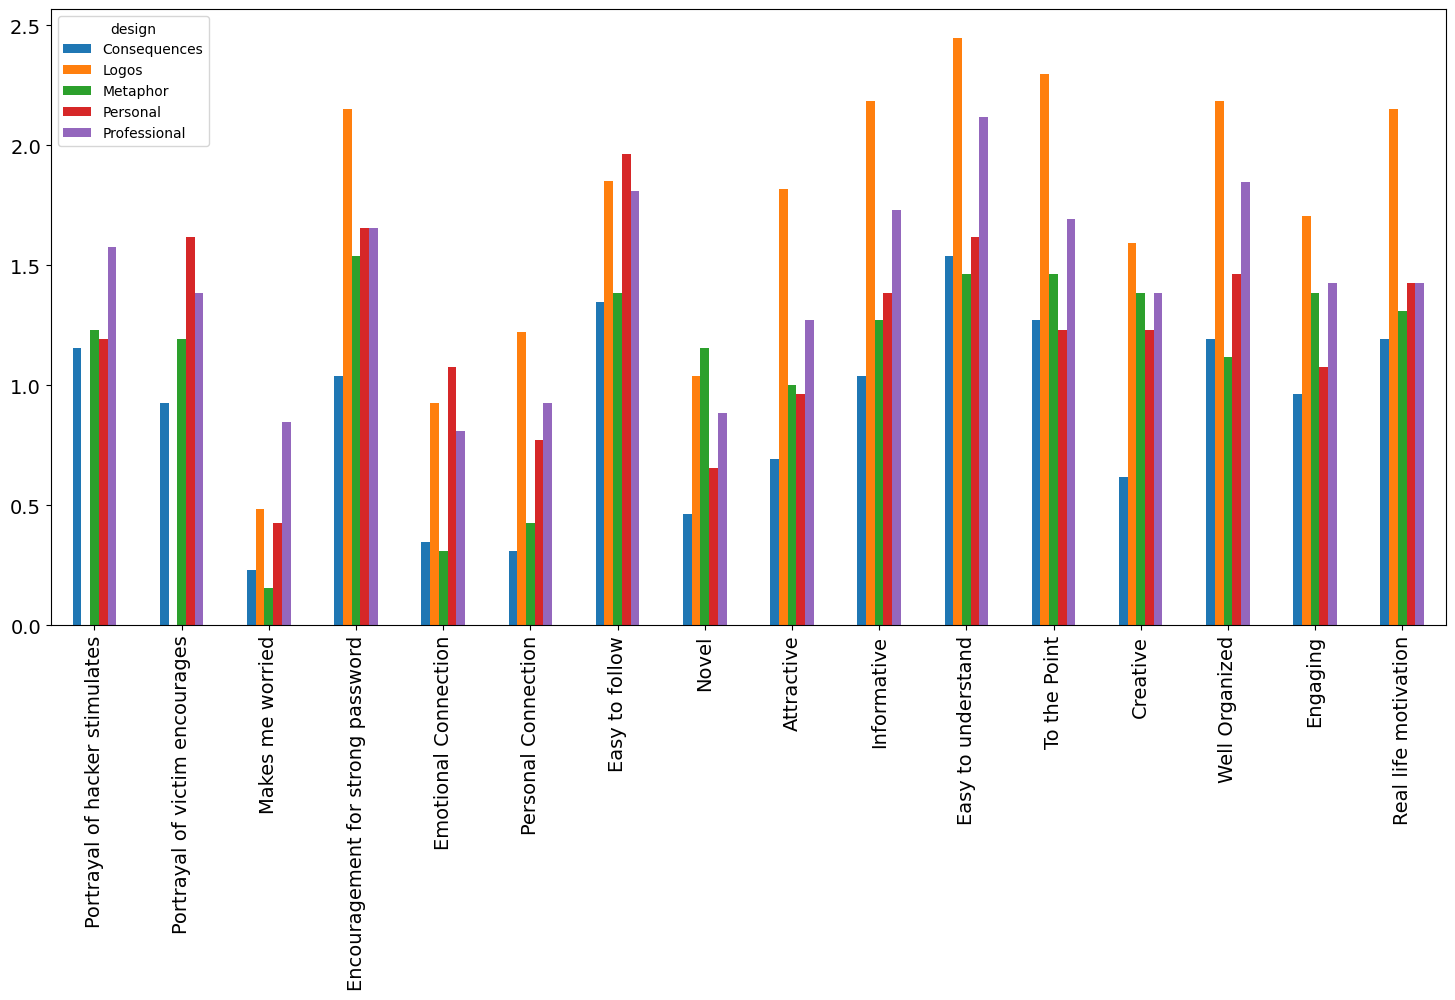

In [19]:
chart = did_csquestquant.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

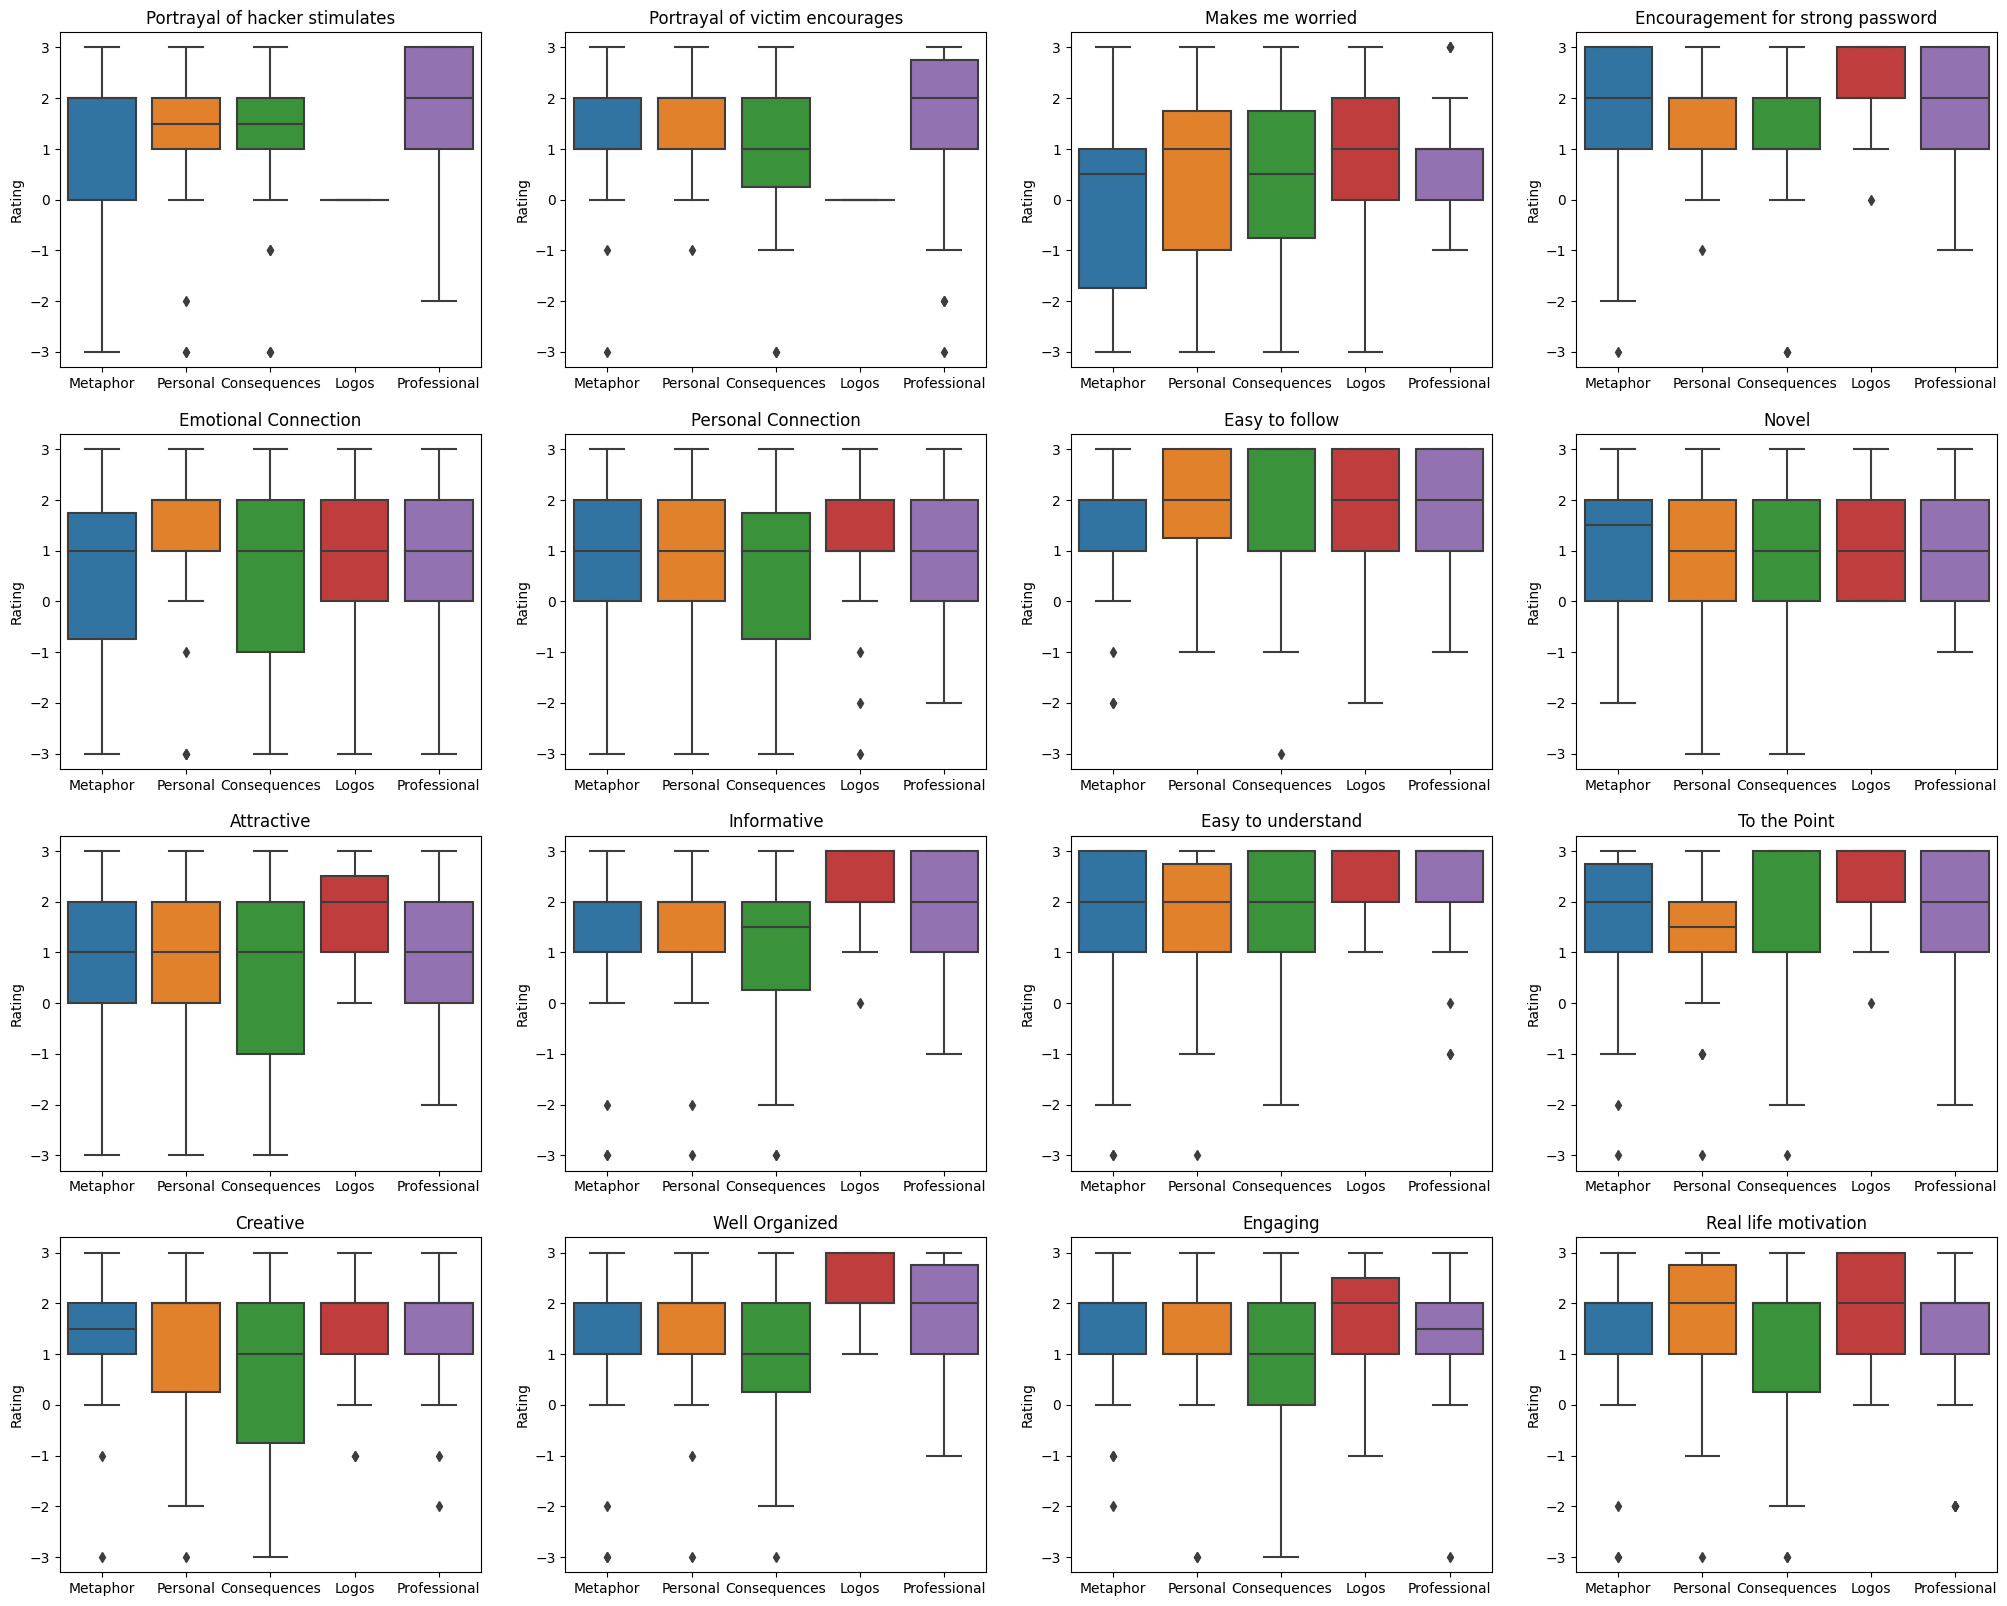

In [20]:
csquestquant
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
k = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(data=csquestquant, x='design', y=csquestquant.columns[k], ax=axes[i][j])
        # sns.swarmplot(data=csquestquant, x='design', y=csquestquant.columns[i+j], ax=axes[i][j])
        axes[i][j].set_ylabel('Rating')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(csquestquant.columns[k])
        k += 1

In [21]:
# for design in did_map.values():
#     fig, axes = plt.subplots(4, 4, figsize=(25, 20))
#     k = 0
#     for i in range(4):
#         for j in range(4):
#             fdata = csquestquant[csquestquant['design']==design]
#             sns.histplot(data=fdata, x=csquestquant.columns[k], kde=True, ax=axes[i][j])
#             axes[i][j].set_ylabel('Rating')
#             axes[i][j].set_xlabel('')
#             axes[i][j].set_title(csquestquant.columns[k] )
#             axes[i][j].set_title(f'{csquestquant.columns[k]} -- p-value: {get_pvalue(fdata[csquestquant.columns[k]])}')
#             k += 1
#     fig.suptitle(f'{design}')

In [ ]:
csquestquant
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
k = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(data=csquestquant, x='design', y=csquestquant.columns[k], ax=axes[i][j])
        # sns.swarmplot(data=csquestquant, x='design', y=csquestquant.columns[i+j], ax=axes[i][j])
        axes[i][j].set_ylabel('Rating')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(csquestquant.columns[k])
        k += 1

In [22]:
test = {}
designs = []
quests = csquestquant.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquestquant[csquestquant['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Portrayal of hacker stimulates: KruskalResult(statistic=30.657402454816708, pvalue=3.59568207315946e-06)
Portrayal of victim encourages: KruskalResult(statistic=39.0281542108956, pvalue=6.873785525125395e-08)
Makes me worried: KruskalResult(statistic=1.4469372883067793, pvalue=0.8359974380241102)
Encouragement for strong password: KruskalResult(statistic=7.130754876219133, pvalue=0.12913766841897564)
Emotional Connection: KruskalResult(statistic=4.179983696642743, pvalue=0.3821953569391785)
Personal Connection: KruskalResult(statistic=5.202324296206577, pvalue=0.2671605378754371)
Easy to follow: KruskalResult(statistic=4.157075901748621, pvalue=0.38516511832706357)
Novel: KruskalResult(statistic=3.01330942132804, pvalue=0.5556005761787701)
Attractive: KruskalResult(statistic=6.981197768344128, pvalue=0.136885179618206)
Informative: KruskalResult(statistic=9.453195330411226, pvalue=0.05071791455382892)
Easy to understand: KruskalResult(statistic=9.932563147904807, pvalue=0.0415790978908

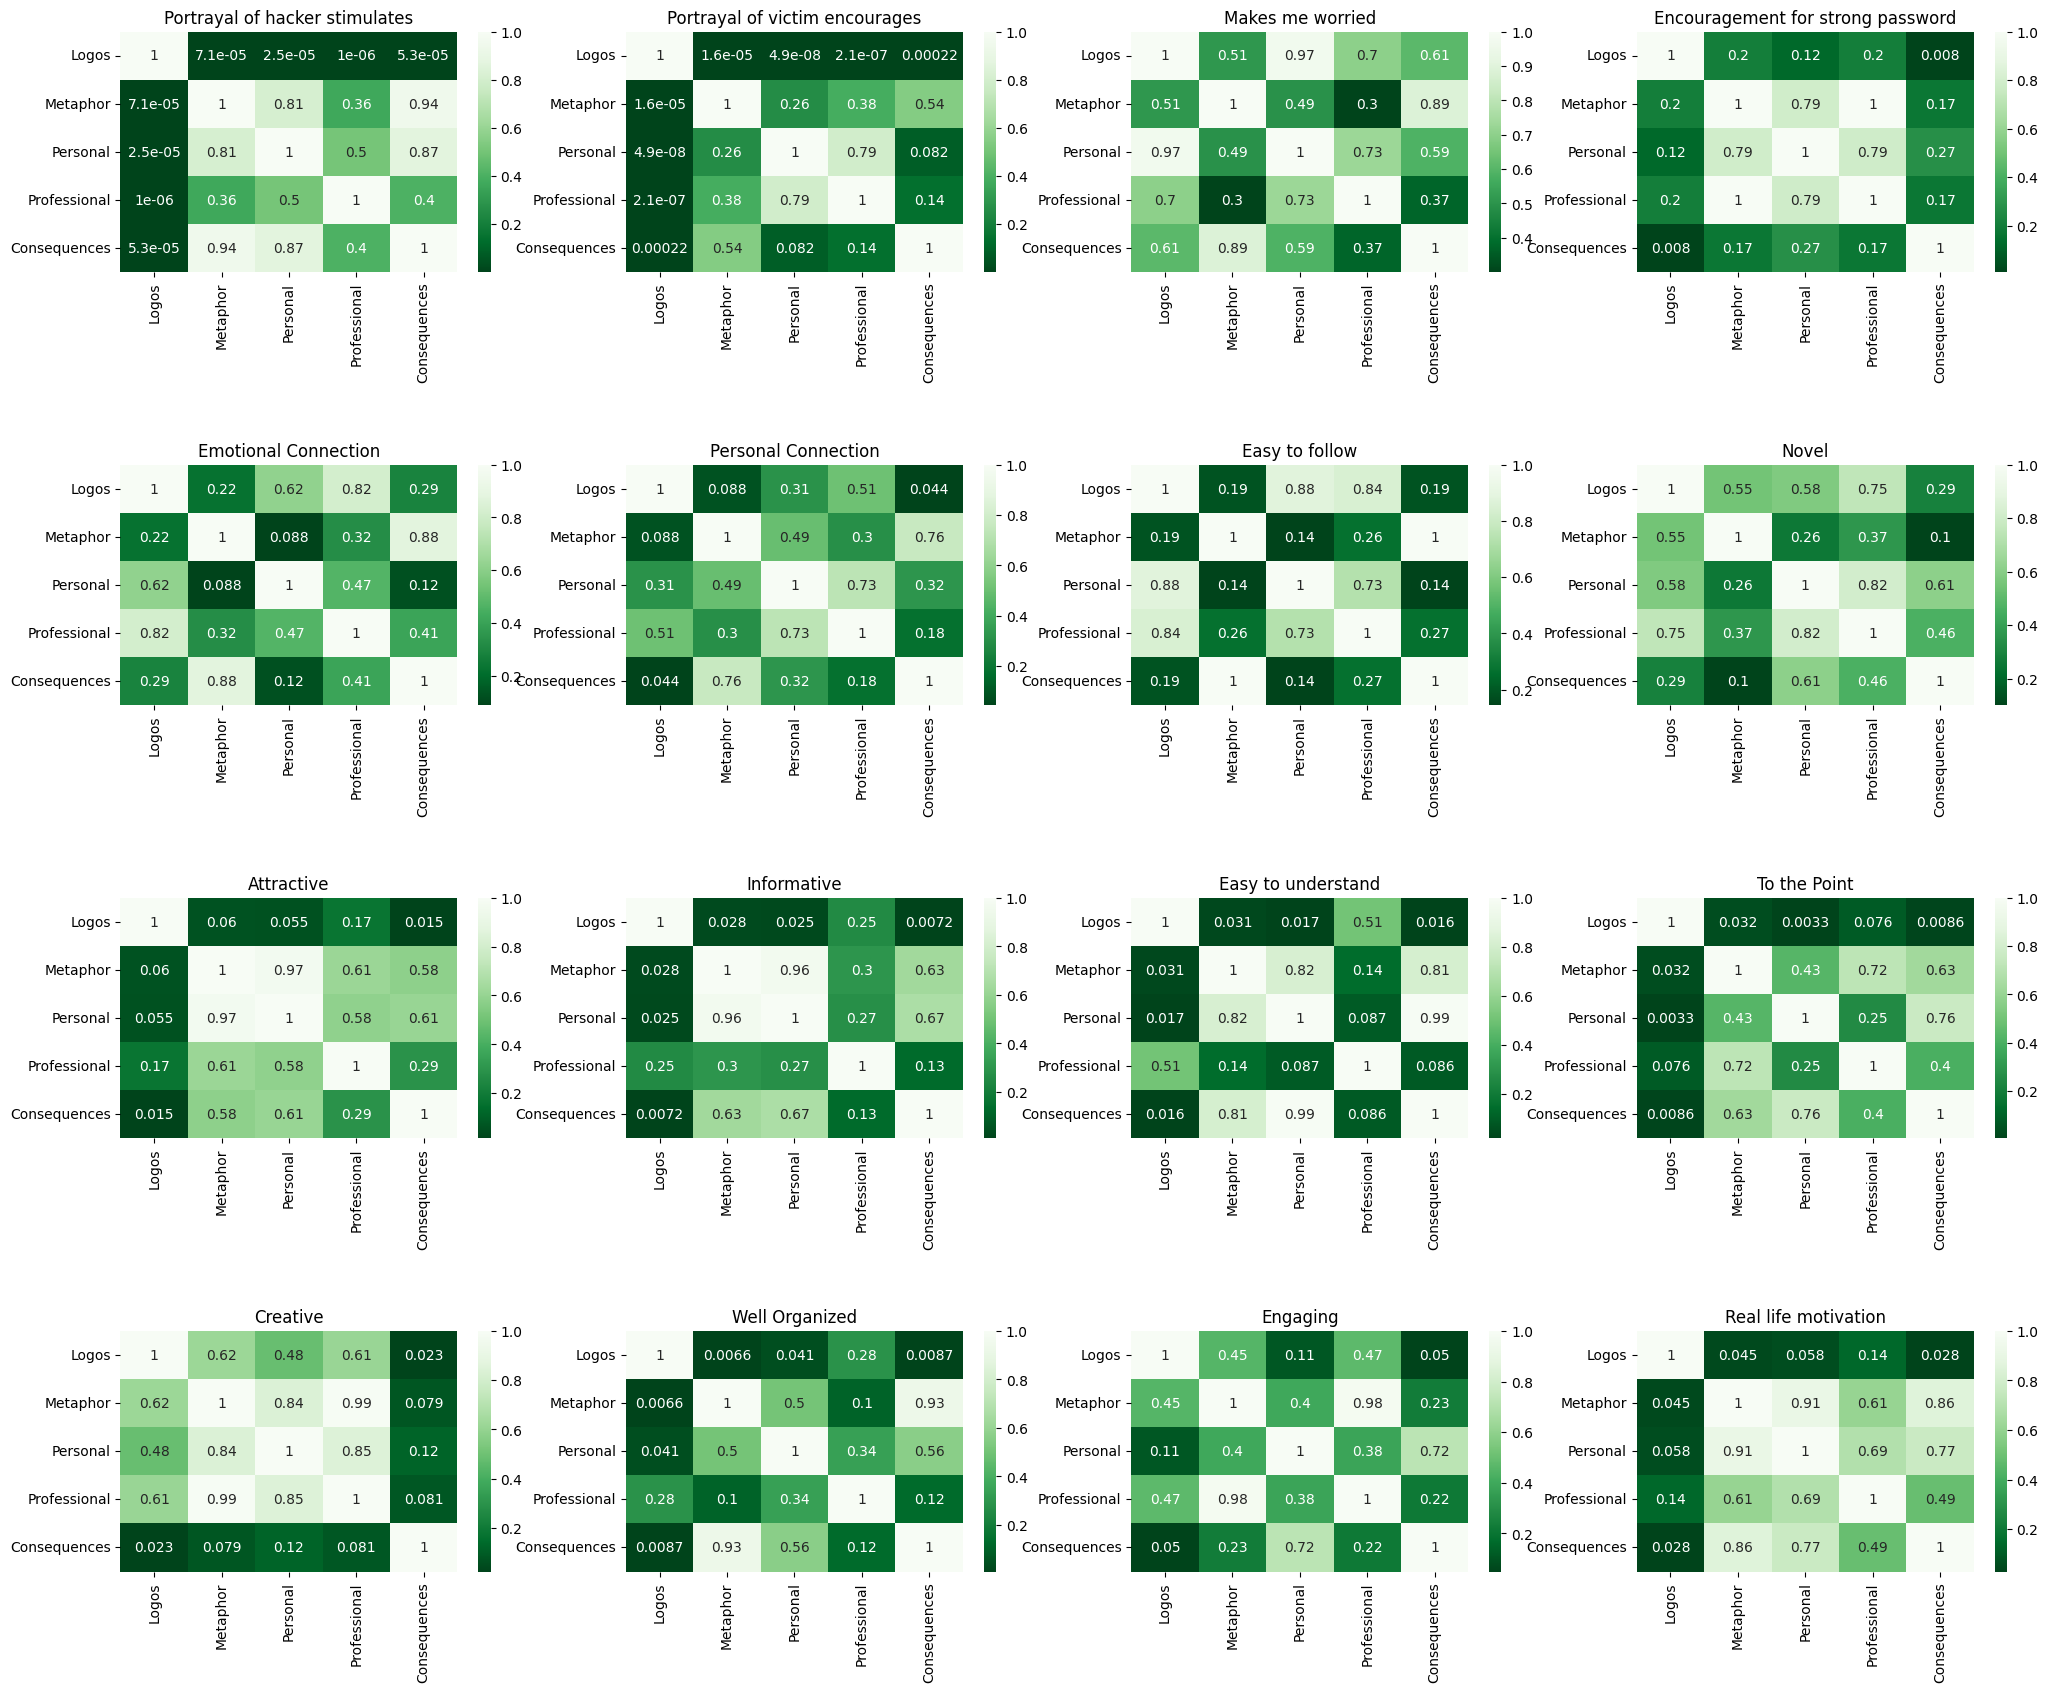

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
fig.subplots_adjust(hspace=0.8)

k=0
for i in range(4):
    for j in range(4):
        data = sp.posthoc_dunn(test[quests[k]])
        data.index = data.index.map(get_design)
        data.columns = data.columns.map(get_design)
        sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
        axes[i][j].set_title(quests[k])
        k += 1

### Using metaphors makes a design more engaging
### more emotionally connected to the design are more motivated to create a strong password
### more emotionally connected to the design create stronger password.
### more personally connected to the design are more motivated to create a strong password 
### more personally connected to the design create stronger password.

In [24]:
csquestquant

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation,design
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0,Metaphor
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0,Personal
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0,Consequences
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,Consequences
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,Logos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,0.0,-3.0,0.0,-3.0,-3.0,2.0,0.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,0.0,Logos
127,2.0,2.0,-3.0,-3.0,-2.0,-3.0,-3.0,0.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,3.0,Consequences
128,1.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,Professional
129,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Logos


/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_33478/2944333125.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = csquestquant.corr(method='pearson')


<AxesSubplot: >

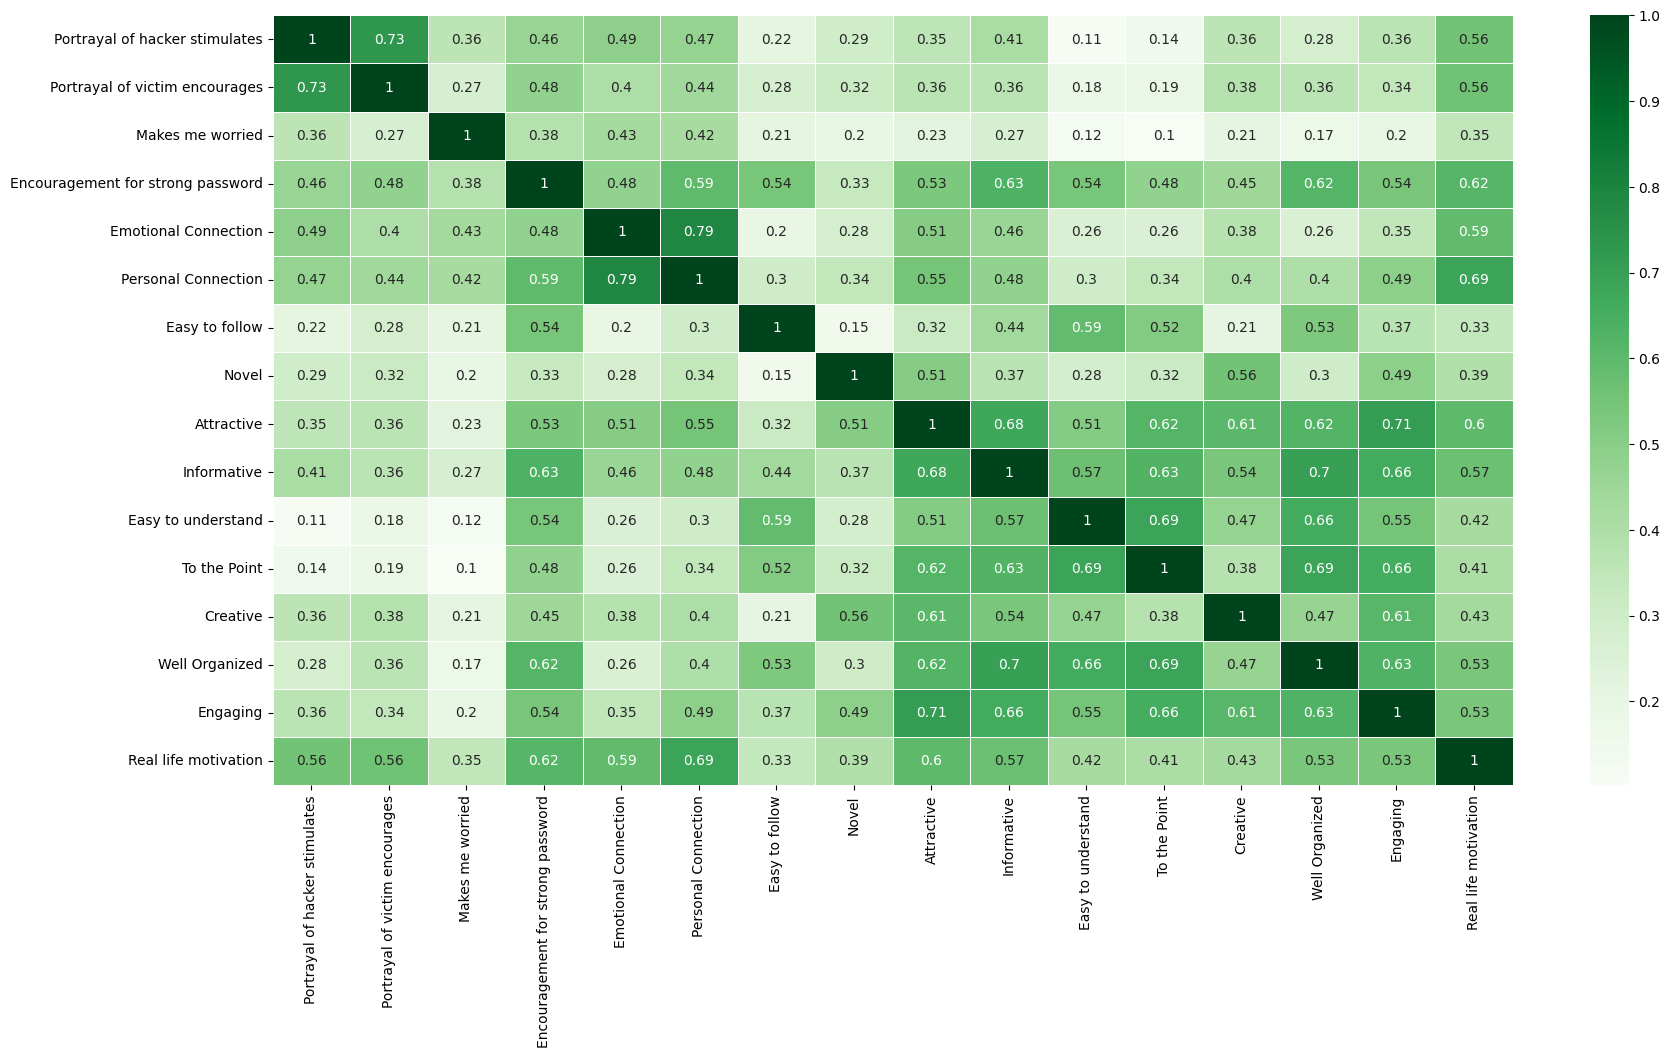

In [25]:
cormat = csquestquant.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_33478/1101049464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = csquestquant[csquestquant['design']==design].corr(method='pearson')


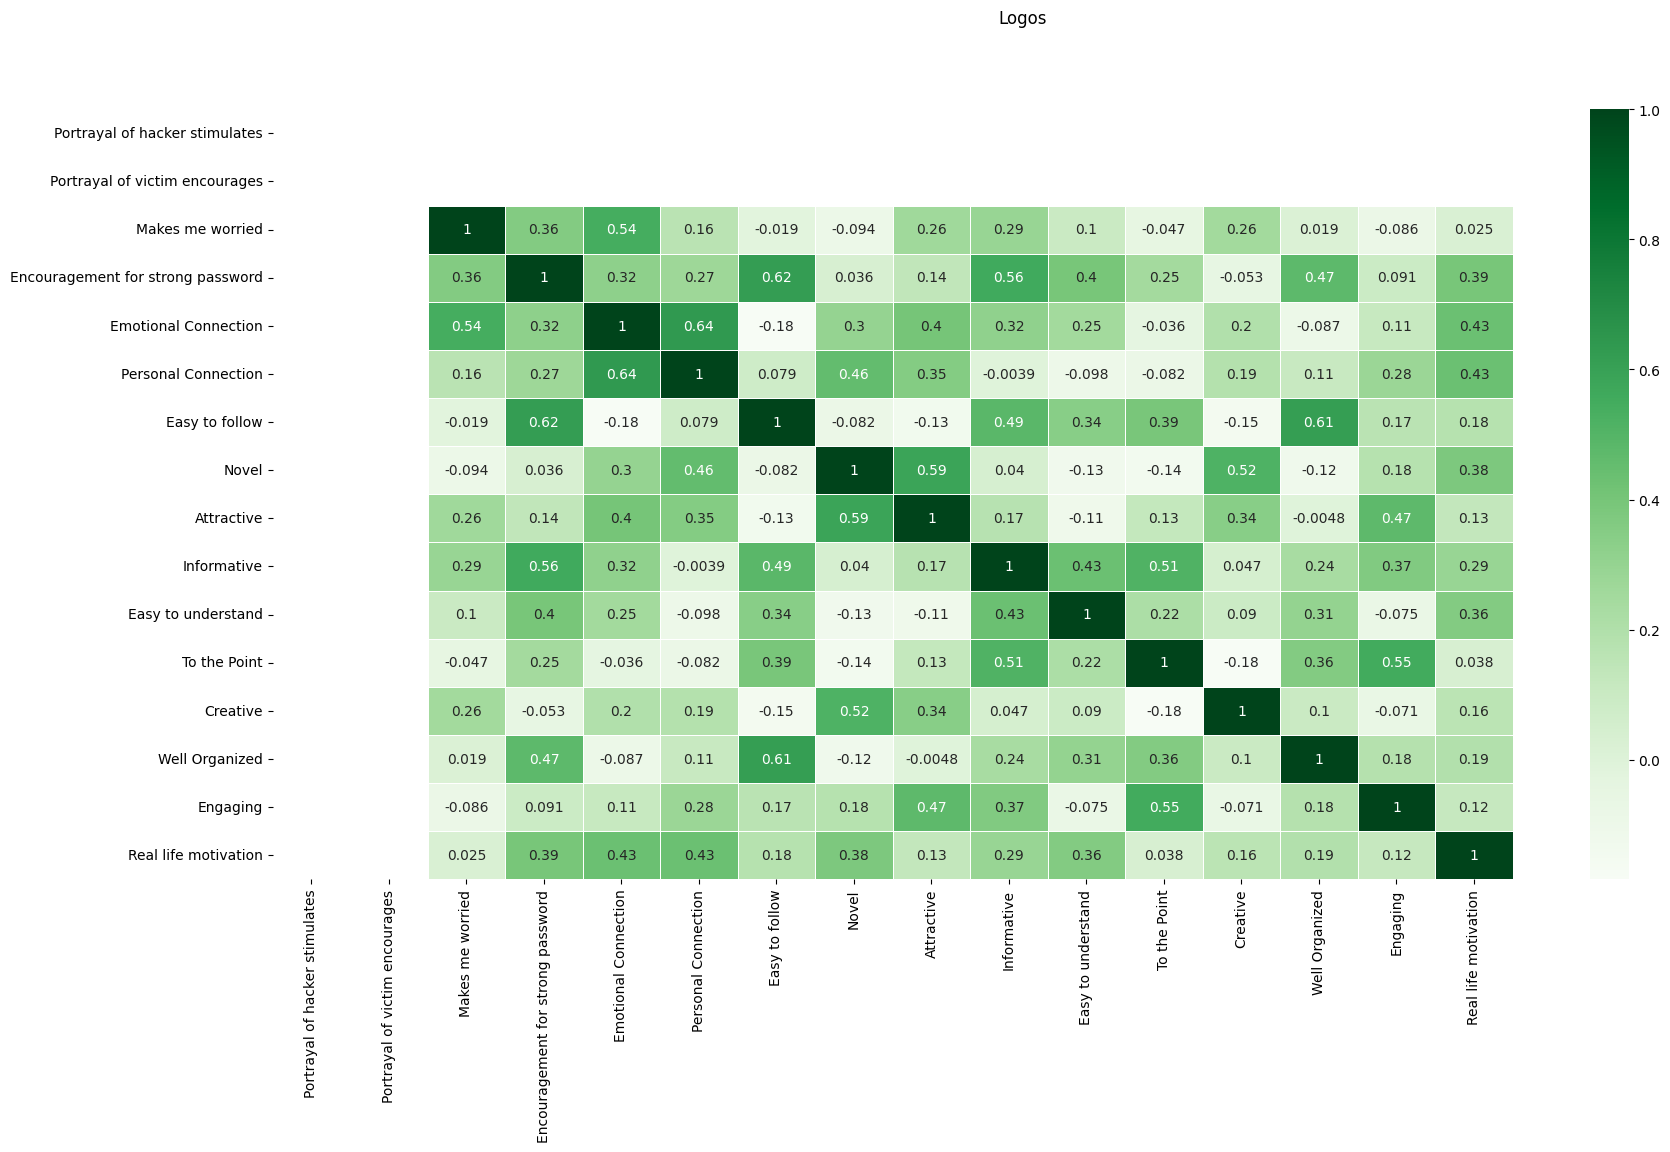

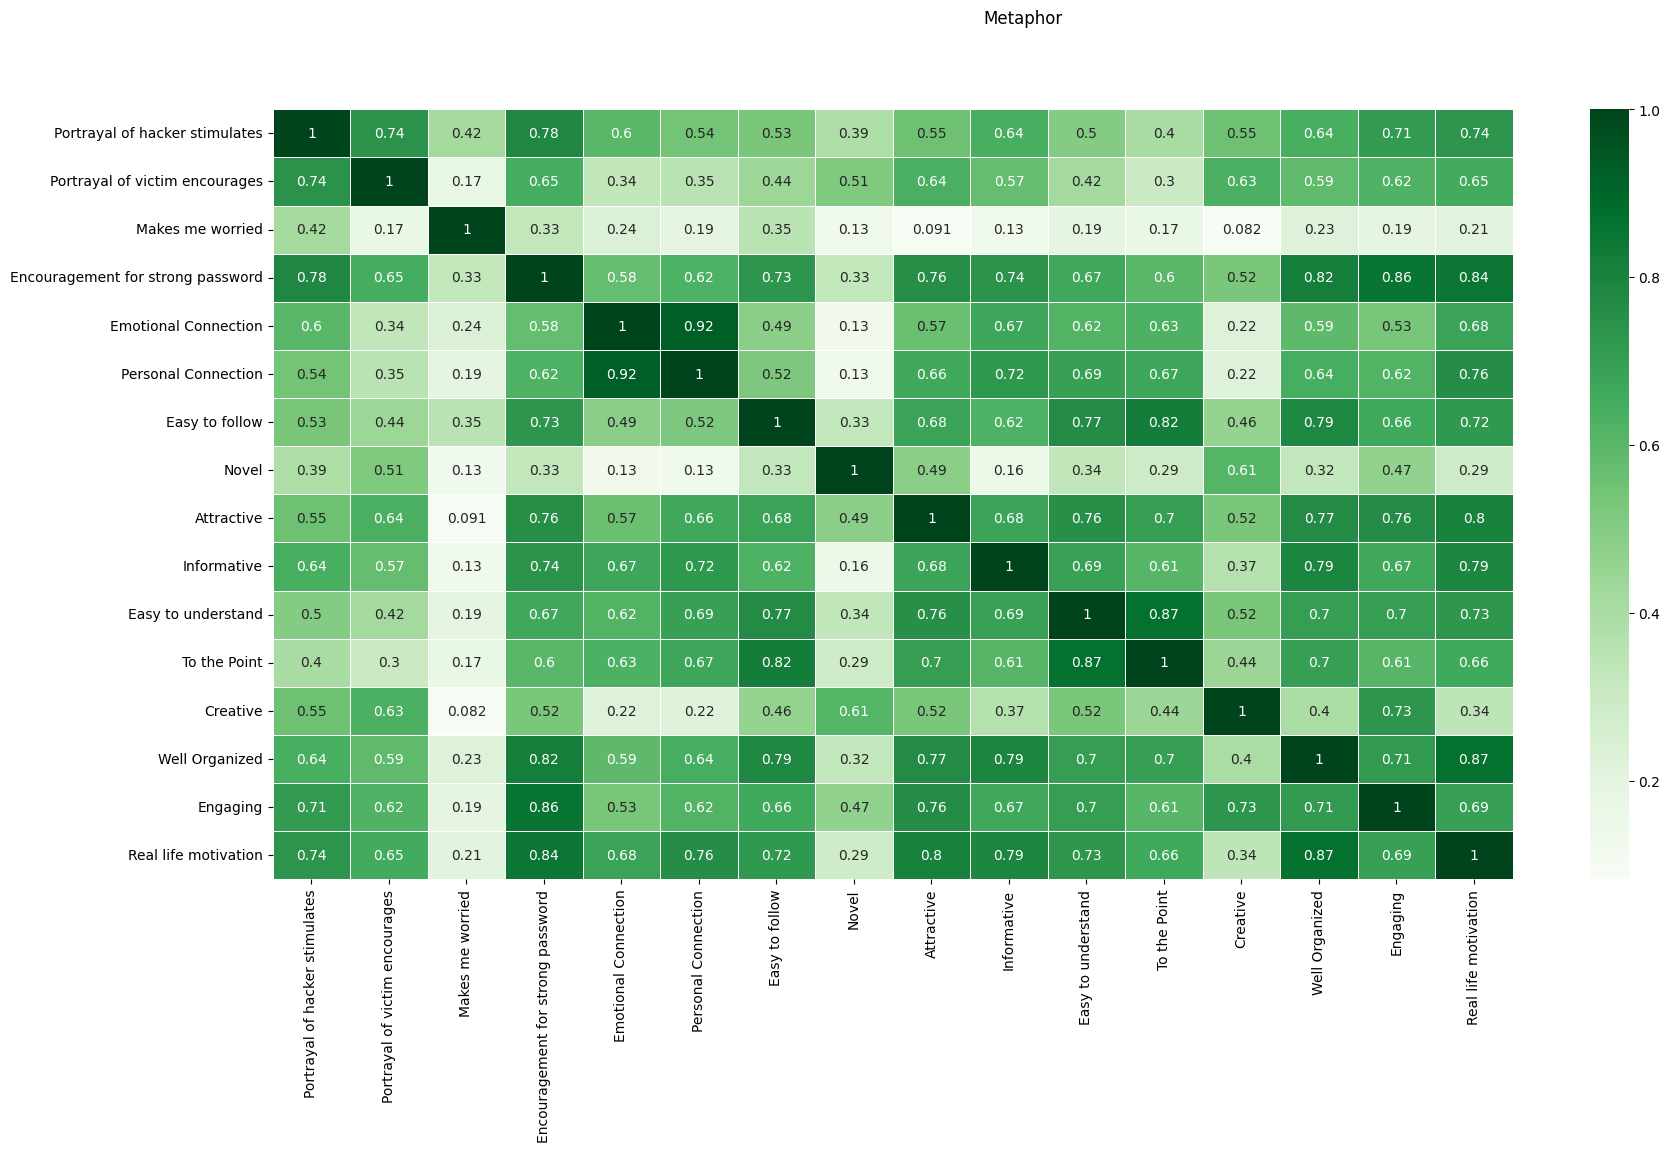

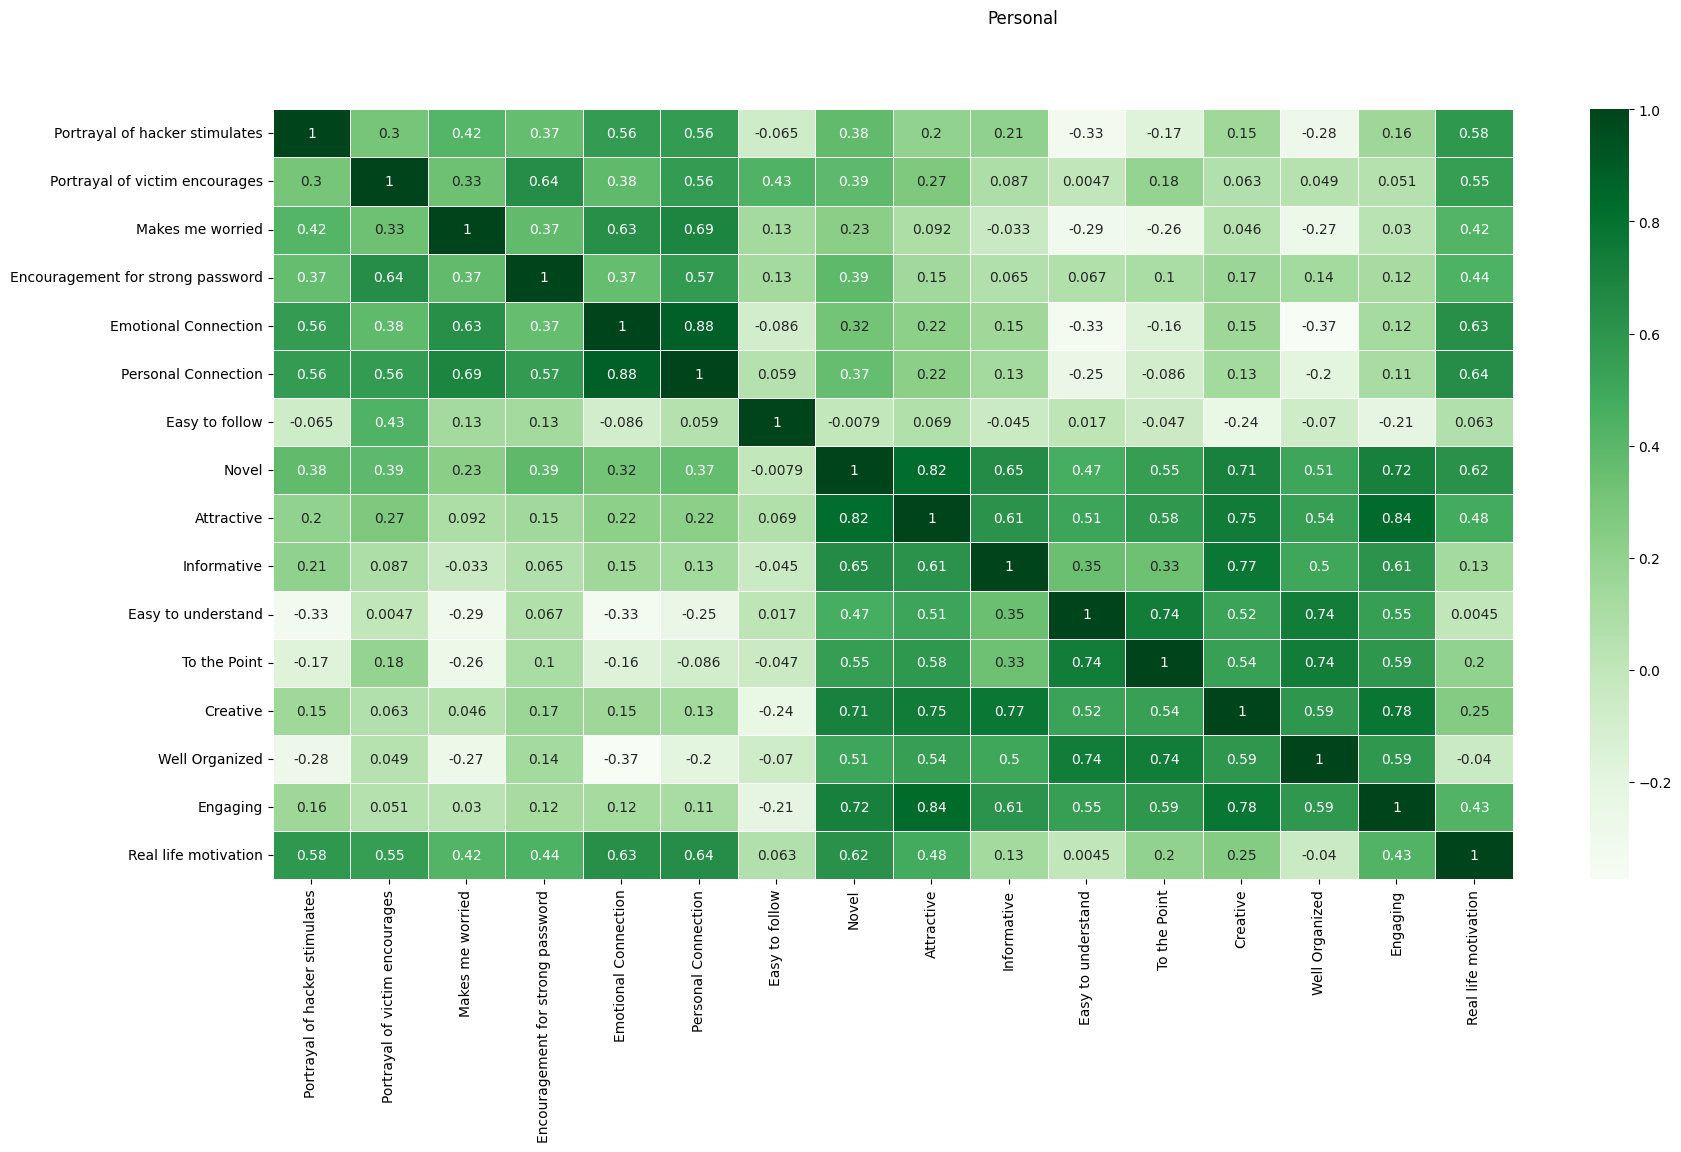

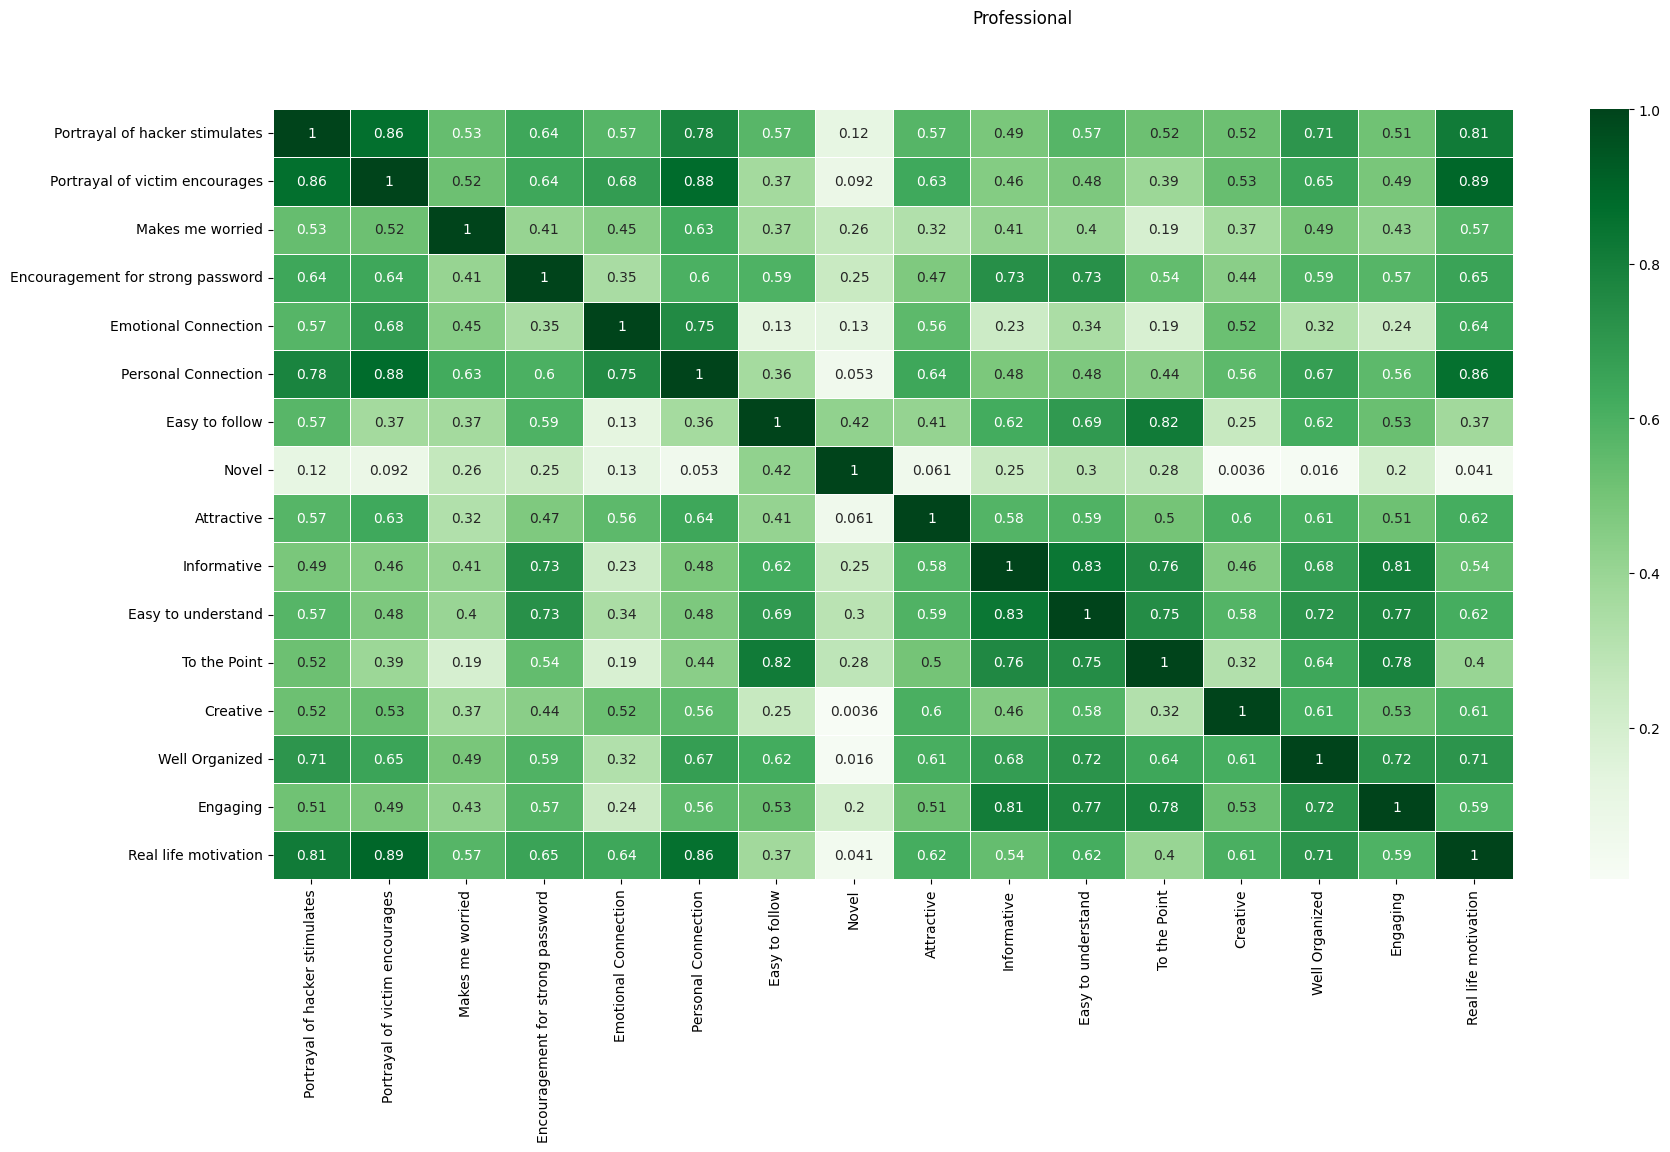

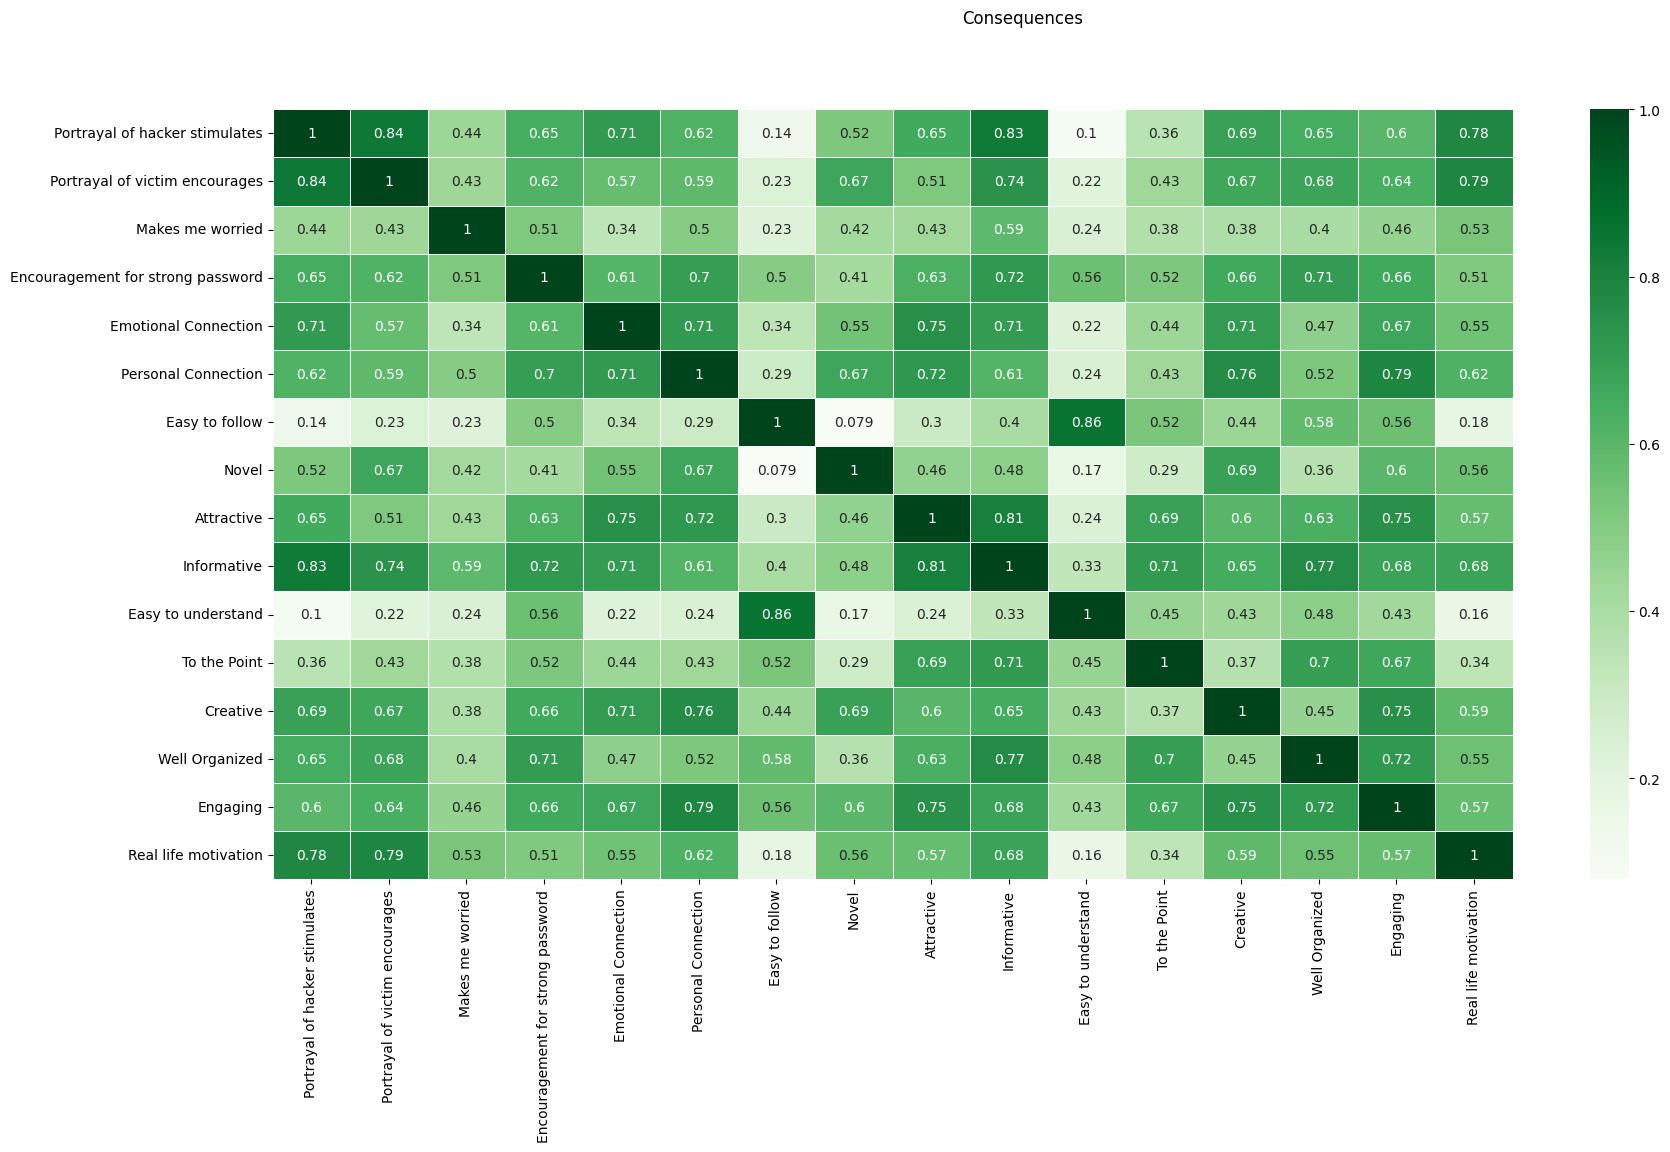

In [26]:
# for design in did_map.values():
#     cormat = csquestquant[csquestquant['design']==design].corr(method='pearson')
#     fig, ax = plt.subplots(figsize=(20, 10))
#     sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)
#     fig.suptitle(design)